<ipython-input-1-c4a898b0cb2b>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Fours'] = data['Fours'].str.replace('+', '').astype(int)
<ipython-input-1-c4a898b0cb2b>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Balls_Faced'] = data['Balls_Faced'].str.replace('+', '').astype(int)
<ipython-input-1-c4a898b0cb2b>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Highest Score'] = data['Highest Score'].str.replace('*', '')


       Unnamed: 0     Matches     Innings    Not Outs    Total Runs  \
count  107.000000  101.000000  107.000000  107.000000    107.000000   
mean    53.000000  104.950495  179.177570   15.757009   7497.317757   
std     31.032241   26.728403   43.886391    8.619680   2240.666493   
min      0.000000   52.000000   80.000000    2.000000   5062.000000   
25%     26.500000   86.000000  146.500000   10.000000   5740.500000   
50%     53.000000  103.000000  177.000000   14.000000   7142.000000   
75%     79.500000  117.000000  199.000000   20.000000   8563.000000   
max    106.000000  200.000000  329.000000   49.000000  15921.000000   

       Highest Score     Average        Fours   Balls_Faced  Strike Rate  \
count     107.000000  107.000000   107.000000    107.000000   107.000000   
mean      246.644860   45.976449   837.205607  13531.383178    50.742150   
std        57.343759    8.073584   305.041622   5813.540094     8.942216   
min       125.000000   30.300000   276.000000   1799.000

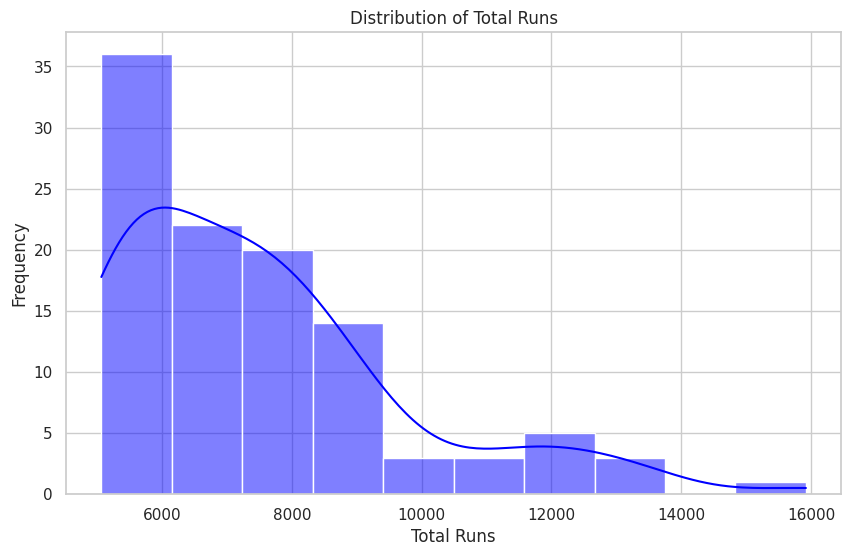

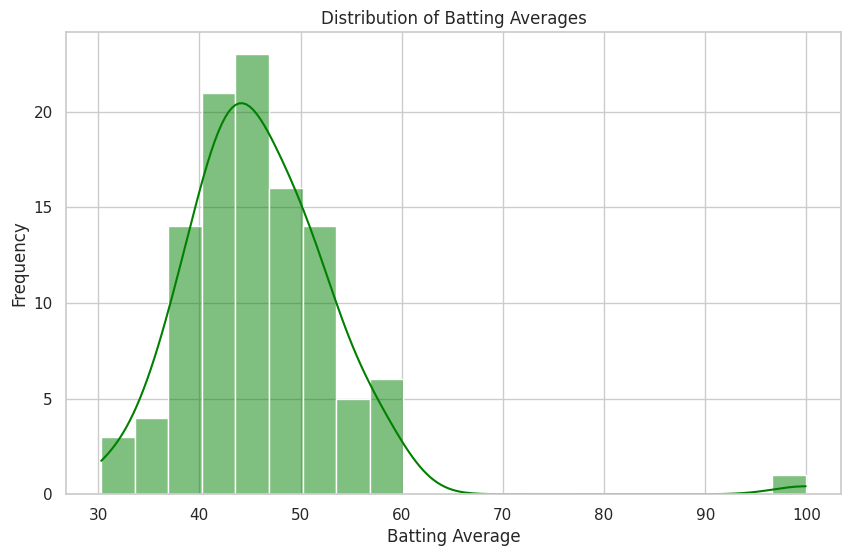

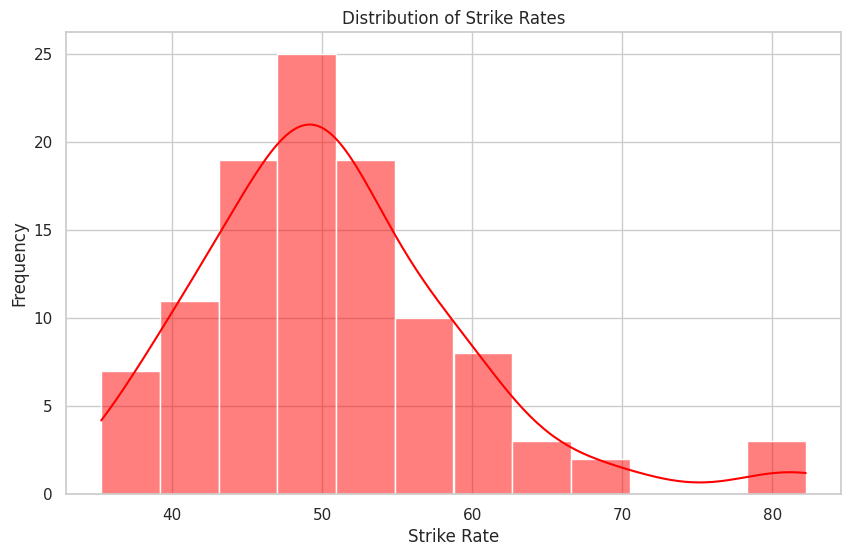

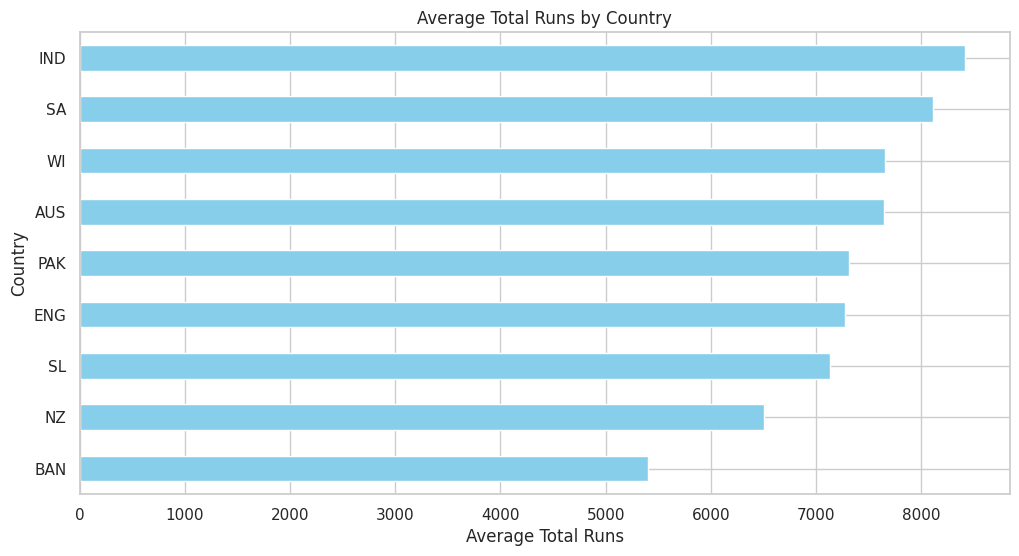

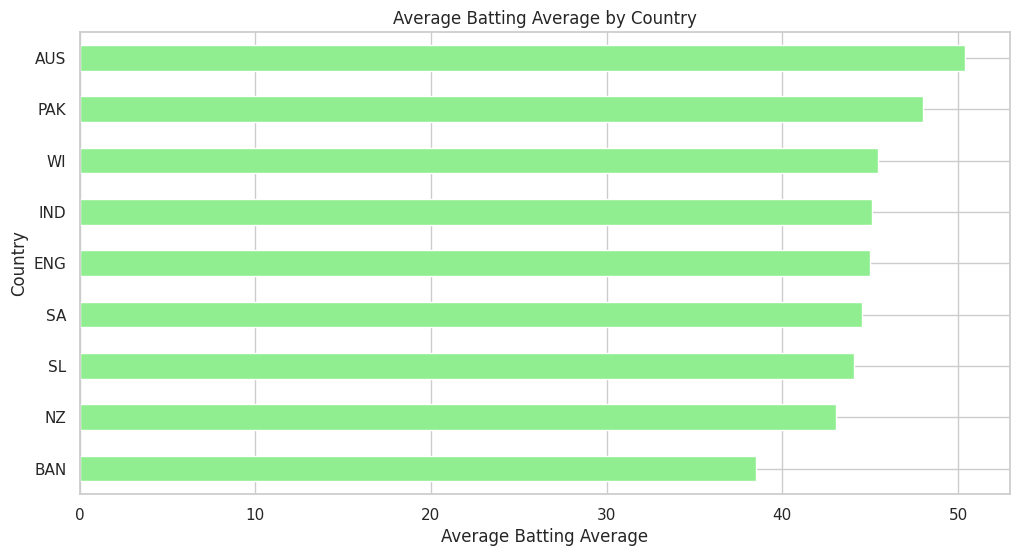

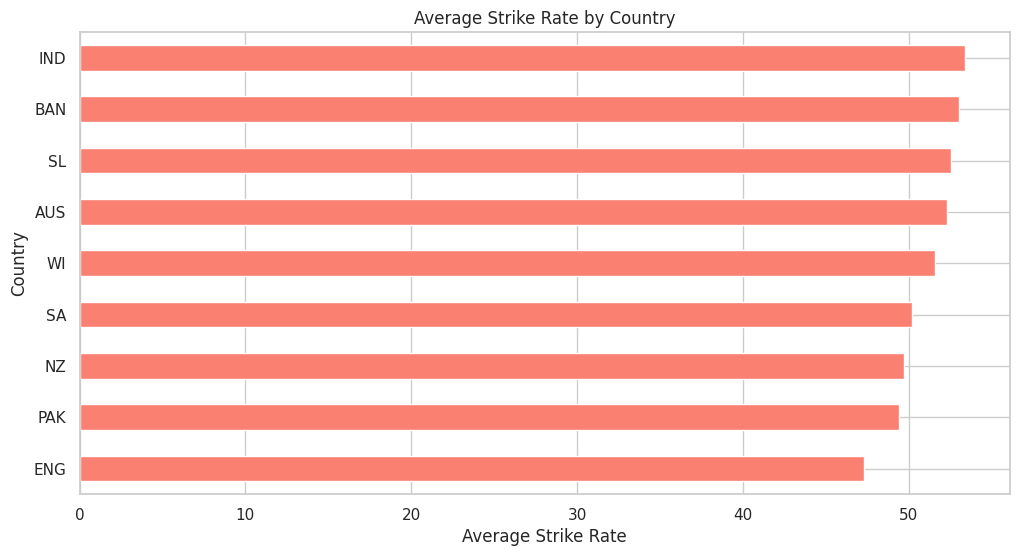

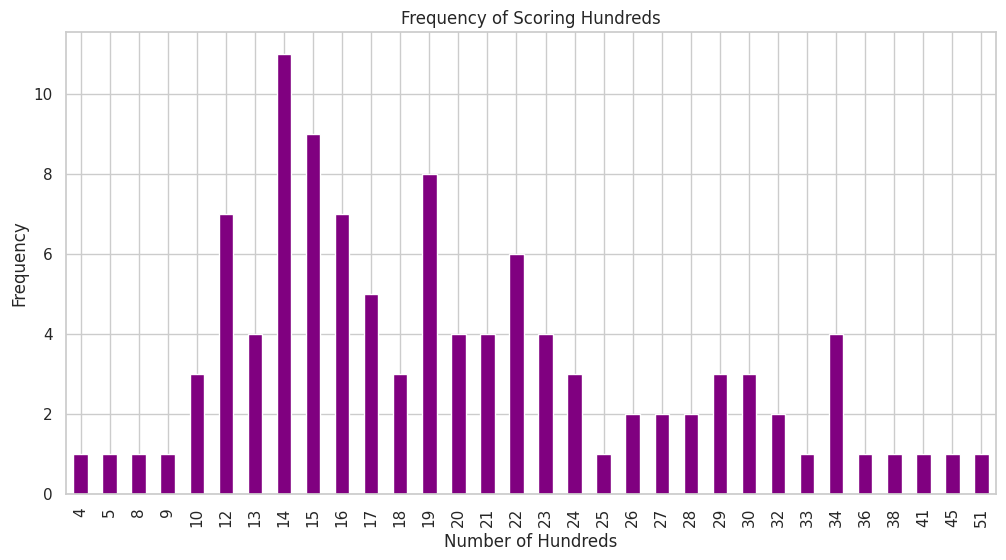

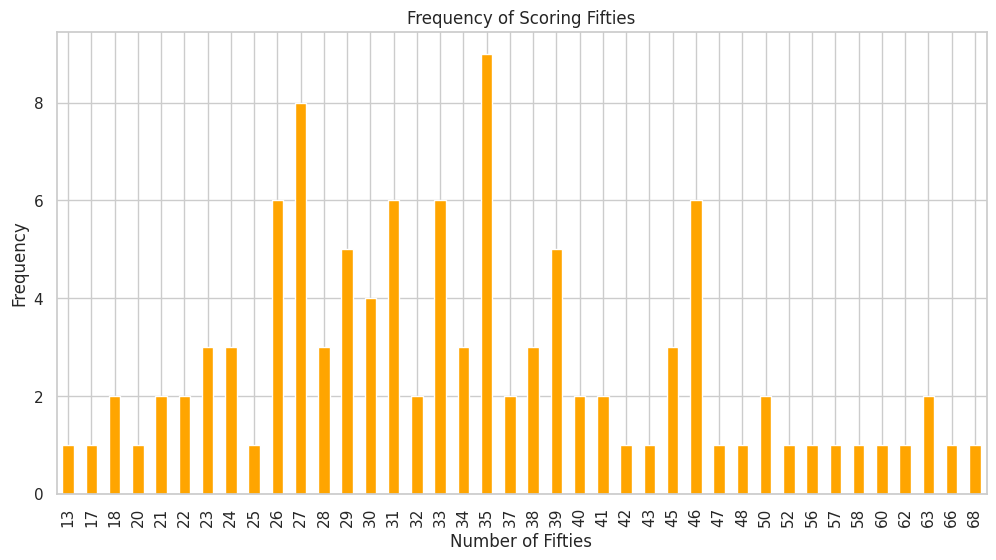

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/test_matches_records.csv'
data = pd.read_csv(file_path)

# Data Cleaning and Conversion
data['Fours'] = data['Fours'].str.replace('+', '').astype(int)
data['Balls_Faced'] = data['Balls_Faced'].str.replace('+', '').astype(int)
data['Matches'] = pd.to_numeric(data['Matches'], errors='coerce')
data['Highest Score'] = data['Highest Score'].str.replace('*', '')
data['Highest Score'] = pd.to_numeric(data['Highest Score'], errors='coerce')
data['Sixes'] = pd.to_numeric(data['Sixes'], errors='coerce')

# EDA: Basic Statistical Overview
print(data.describe())

# EDA: Player Performance Analysis
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Runs'], kde=True, color='blue')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Average'], kde=True, color='green')
plt.title('Distribution of Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Strike Rate'], kde=True, color='red')
plt.title('Distribution of Strike Rates')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

# EDA: Country-wise Performance Analysis
avg_runs_by_country = data.groupby('Country')['Total Runs'].mean().sort_values()
avg_batting_avg_by_country = data.groupby('Country')['Average'].mean().sort_values()
avg_strike_rate_by_country = data.groupby('Country')['Strike Rate'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_runs_by_country.plot(kind='barh', color='skyblue')
plt.title('Average Total Runs by Country')
plt.xlabel('Average Total Runs')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(12, 6))
avg_batting_avg_by_country.plot(kind='barh', color='lightgreen')
plt.title('Average Batting Average by Country')
plt.xlabel('Average Batting Average')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(12, 6))
avg_strike_rate_by_country.plot(kind='barh', color='salmon')
plt.title('Average Strike Rate by Country')
plt.xlabel('Average Strike Rate')
plt.ylabel('Country')
plt.show()

# EDA: Milestone Achievements Analysis
hundreds_frequency = data['Hundreds'].value_counts().sort_index()
fifties_frequency = data['Fifty'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hundreds_frequency.plot(kind='bar', color='purple')
plt.title('Frequency of Scoring Hundreds')
plt.xlabel('Number of Hundreds')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
fifties_frequency.plot(kind='bar', color='orange')
plt.title('Frequency of Scoring Fifties')
plt.xlabel('Number of Fifties')
plt.ylabel('Frequency')
plt.show()
